# **Hello Vectors**

In natural language processing, we represent each word as a vector consisting of numbers.
The vector encodes the meaning of the word. These numbers (or weights) for each word are learned using various machine
learning models, which we will explore in more detail later in this specialization. Rather than make you code the
machine learning models from scratch, we will show you how to use them. In the real world, you can always load the
trained word vectors, and you will almost never have to train them from scratch. In this assignment you will

- Predict analogies between words.
- Use PCA to reduce the dimensionality of the word embeddings and plot them in two dimensions.
- Compare word embeddings by using a similarity measure (the cosine similarity).
- Understand how these vector space models work.


<a name='1'></a>
## **1 - Predict the Countries from Capitals**

During the presentation of the module, we have illustrated the word analogies
by finding the capital of a country from the country. In this part of the assignment
we have changed the problem a bit. You are asked to predict the **countries**
that correspond to some **capitals**.
You are playing trivia against some second grader who just took their geography test and knows all the capitals by heart.
Thanks to NLP, you will be able to answer the questions properly. In other words, you will write a program that can give
you the country by its capital. That way you are pretty sure you will win the trivia game. We will start by exploring the data set.


<a name='1-1'></a>
###  **1.1 Importing the Data**

As usual, you start by importing some essential Python libraries and the load dataset.
The dataset will be loaded as a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html),
which is very a common method in data science. Because of the large size of the data,
this may take a few minutes.

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
def get_vectors(embeddings, words):
  """
  Input:
    embeddings: a word
    fr_embeddings:
    words: a list of words
  Output:
    x: a matrix where the rows are the embeddings corresponding to the rows on this list
  """

  m= len(words)
  X= np.zeros((1, 300))
  for word in words:
    english= word
    eng_emb= embeddings[english]
    X= np.row_stack((X, eng_emb))
  X= X[1:, :]
  return X


In [21]:
data= pd.read_csv("/content/capitals.txt", delimiter= " ")
data.columns= ["city1", "country1", "city2", "country2"]

data.head(5)

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [24]:
word_embeddings= pickle.load(open("/content/word_embeddings_subset.p", "rb"))
len(word_embeddings)

243

Each of the word embedding is a 300-dimentional vector.

In [23]:
print("dimension: {}".format(word_embeddings["Spain"].shape[0]))

dimension: 300


#### **Predict relationships among words**

Now you will write a function that will use the word embeddings to predict relationships among words.
* The function will take as input three words.
* The first two are related to each other.
* It will predict a 4th word which is related to the third word in a similar manner as the two first words are related to each other.
* As an example, "Athens is to Greece as Bangkok is to ______"?
* You will write a program that is capable of finding the fourth word.
* We will give you a hint to show you how to compute this.


<a name='1-2'></a>
### **1.2 Cosine Similarity**

The cosine similarity function is:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$A$ and $B$ represent the word vectors and $A_i$ or $B_i$ represent index i of that vector. Note that if A and B are identical, you will get $cos(\theta) = 1$.
* Otherwise, if they are the total opposite, meaning, $A= -B$, then you would get $cos(\theta) = -1$.
* If you get $cos(\theta) =0$, that means that they are orthogonal (or perpendicular).
* Numbers between 0 and 1 indicate a similarity score.
* Numbers between -1 and 0 indicate a dissimilarity score.

<a name='ex-1'></a>
### **1 - cosine_similarity**
Implement a function that takes in two word vectors and computes the cosine distance.

In [25]:
def cosine_similarity(A, B):
  """
  Input:
    A: a numpy array which corresponds to a word vector
    B: A numpy array which corresponds to a word vector
  Output:
    cos: numerical number representing the cosine similarity between A and B.
  """

  dot= np.dot(A, B)
  norma= np.linalg.norm(A)
  normb= np.linalg.norm(B)
  cos= dot/(norma*normb)

  return cos

In [26]:
king= word_embeddings["king"]
queen= word_embeddings["queen"]

cosine_similarity(king, queen)

np.float32(0.6510956)

<a name='1-3'></a>
### **1.3 Euclidean Distance**

You will now implement a function that computes the similarity between two vectors using the Euclidean distance.
Euclidean distance is defined as:

$$ \begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$$

* $n$ is the number of elements in the vector
* $A$ and $B$ are the corresponding word vectors.
* The more similar the words, the more likely the Euclidean distance will be close to 0.

<a name='ex-2'></a>
### 2 - euclidean
Implement a function that computes the Euclidean distance between two vectors.

In [27]:
def euclidean(A, B):
  """
  Input:
    A: a numpy array which corresponds to a word vector
    B: A numpy array which corresponds to a word vector
  Output:
    dist: numerical number representing the Euclidean distance between A and B.
  """
  dist= np.linalg.norm(A - B)
  return dist


In [12]:
euclidean(king, queen)

np.float32(2.4796925)

<a name='1-4'></a>
### **1.4 Finding the Country of each Capital**

Now, you  will use the previous functions to compute similarities between vectors,
and use these to find the capital cities of countries. You will write a function that
takes in three words, and the embeddings dictionary. Your task is to find the
capital cities. For example, given the following words:

- 1: Athens 2: Greece 3: Baghdad,

your task is to predict the country 4: Iraq.

<a name='ex-3'></a>
### **3 - get_country**
**Instructions**:

1. To predict the capital you might want to look at the *King - Man + Woman = Queen* example above, and implement that scheme into a mathematical function, using the word embeddings and a similarity function.

2. Iterate over the embeddings dictionary and compute the cosine similarity score between your vector and the current word embedding.

3. You should add a check to make sure that the word you return is not any of the words that you fed into your function. Return the one with the highest score.

In [28]:
def get_country(city1, country1, city2, word_embeddings, cosine_similarity= cosine_similarity):

  """
  Input:
    city1: a string (the capital city of country1)
    country1: a string (the country of capital1)
    city2: a string (the capital city of country2)
    word_embeddings: a dictionary where the keys are words and values are their corresponding vectors.
    cosine_similarity: a function that computes the cosine similarity between vectors.
  Output:
    country: a dictionary with the most likely country and its similarity score.
  """

  # store the city1, country1, city2 in a set called group
  group= {city1, country1, city2}

  # get embeddings
  city1_emb= word_embeddings[city1]
  country1_emb= word_embeddings[country1]
  city2_emb= word_embeddings[city2]

  # get the embeddings of the cities
  vec= country1_emb - city1_emb + city2_emb

  # initialize similarity and result container
  similarity= -1
  country= ("", 0)

  # loop through all candidate words
  for word in word_embeddings.keys():
    if word not in group:
      word_emb= word_embeddings[word]
      cur_similarity= cosine_similarity(vec, word_emb)

      if cur_similarity > similarity:
        similarity= cur_similarity
        country= (word, similarity)

  return country



In [29]:
get_country("Athens", "Greece", "Damascus", word_embeddings)

('Syria', np.float32(0.7622637))

<a name='1-5'></a>
### **1.5 Model Accuracy**

Now you will test your new function on the dataset and check the accuracy of the model:

$$\text{Accuracy}=\frac{\text{Correct # of predictions}}{\text{Total # of predictions}}$$

<a name='ex-4'></a>
### **4 - get_accuracy**
**Instructions**: Implement a program that can compute the accuracy on the dataset provided for you. You have to iterate over every row to get the corresponding words and feed them into you `get_country` function above.

In [34]:
def get_accuracy(word_embeddings, data, get_country=get_country):
  """
  Input:
    word_embeddings: a dictionary where the key is a word and the value is its embedding
    data: a pandas DataFrame containing all the country and capital city pairs
  Output:
    accuracy: a float representing the prediction accuracy
  """
  # initialize num correct to zero
  num_correct= 0

  # loop through the rows of the dataframe
  for i, row in data.iterrows():
    city1= row["city1"]
    country1= row["country1"]
    city2= row["city2"]
    # get country2 (ground truth)
    country2= row["country2"]

    # use get_country to find predicted country2
    predicted_country2, _= get_country(city1, country1, city2, word_embeddings)

    # if the predicted country2 is the same as the actual country2
    if predicted_country2 == country2:
      # incement the number fo correct by 1
      num_correct+= 1

    # get the number of rows in the datafreame
    m= len(data)

    # calculate the accuracy by dividing the number correct by m
    accuracy = num_correct/m

  return accuracy

In [35]:
accuracy= get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


<a name='2'></a>
## **2 - Plotting the vectors using PCA**

Now you will explore the distance between word vectors after reducing their dimension.
The technique we will employ is known as
[*principal component analysis* (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis).
As we saw, we are working in a 300-dimensional space in this case.
Although from a computational perspective we were able to perform a good job,
it is impossible to visualize results in such high dimensional spaces.

You can think of PCA as a method that projects our vectors in a space of reduced
dimension, while keeping the maximum information about the original vectors in
their reduced counterparts. In this case, by *maximum infomation* we mean that the
Euclidean distance between the original vectors and their projected siblings is
minimal. Hence vectors that were originally close in the embeddings dictionary,
will produce lower dimensional vectors that are still close to each other.

You will see that when you map out the words, similar words will be clustered
next to each other. For example, the words 'sad', 'happy', 'joyful' all describe
emotion and are supposed to be near each other when plotted.
The words: 'oil', 'gas', and 'petroleum' all describe natural resources.
Words like 'city', 'village', 'town' could be seen as synonyms and describe a
similar thing.

Before plotting the words, you need to first be able to reduce each word vector
with PCA into 2 dimensions and then plot it. The steps to compute PCA are as follows:

1. Mean normalize the data
2. Compute the covariance matrix of your data ($\Sigma$).
3. Compute the eigenvectors and the eigenvalues of your covariance matrix
4. Multiply the first K eigenvectors by your normalized data.


<a name='ex-5'></a>
### **5 - compute_pca**

**Instructions**:

Implement a program that takes in a data set where each row corresponds to a word vector.
* The word vectors are of dimension 300.
* Use PCA to change the 300 dimensions to `n_components` dimensions.
* The new matrix should be of dimension `m, n_components`.

* First de-mean the data
* Get the eigenvalues using `linalg.eigh`.  Use 'eigh' rather than 'eig' since R is symmetric.  The performance gain when using eigh instead of eig is substantial.
* Sort the eigenvectors and eigenvalues by decreasing order of the eigenvalues.
* Get a subset of the eigenvectors (choose how many principle components you want to use using n_components).
* Return the new transformation of the data by multiplying the eigenvectors with the original data.

In [36]:
def compute_pca(X, n_components= 2):
  """
  Input:
    X: Numpy array of shape (m, n) where each row corresponds to a word vector
    n_components: Number of components you want to keep.
  Output:
    X_reduced: Transformed data in n_components dimensions
  """

  # mean center the data
  X_demeaned= X - np.mean(X, axis=0)

  # Calculate the covariance matrix
  covariance_matrix = np.cov(X_demeaned, rowvar=False)

  # Compute eigenvalues and eigenvectors
  eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix)

  # Sort eigenvalues and eigenvectors in decreasing order
  idx_sorted = np.argsort(eigen_vals)
  idx_sorted_decreasing = idx_sorted[::-1]
  eigen_vecs_sorted = eigen_vecs[:, idx_sorted_decreasing]

  # Select the first n_components eigenvectors
  eigen_vecs_subset = eigen_vecs_sorted[:, :n_components]

  # Project the data onto the selected components
  X_reduced = np.dot(X_demeaned, eigen_vecs_subset)

  return X_reduced

In [37]:
#test
np.random.seed(1)
X= np.random.rand(3, 10)
X_reduced= compute_pca(X, n_components= 2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

Your original matrix was (3, 10) and it became:
[[ 0.43437323 -0.49820384]
 [ 0.42077249  0.50351448]
 [-0.85514571 -0.00531064]]


In [42]:
words= ["oil", "gas", "happy", "sad", "town", "village", "country", "continent", "petroleum", "joyful"]

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X= get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (10, 300)


<ipython-input-39-bde0e625a6c8>:16: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  X= np.row_stack((X, eng_emb))


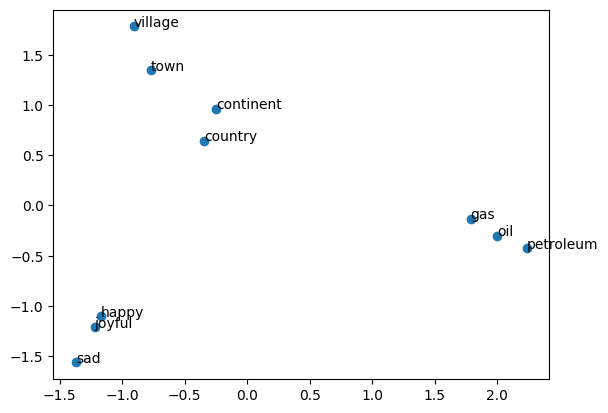

In [49]:
# we have done the poltting for you. Just run this cell.
result= compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0] - 0.0005, result[i, 1] - 0.0005))
plt.show()